## Context
When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men and women’s shoes, and to group products together to identify similarities and differences between the product range of these renowned brands.

## Objective
To perform and exploratory data analysis and cluster the products based on various factors


## Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?

## Data
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product


**Importing necessary libraries**

In [8]:
import sklearn as s
s.__version__

'0.24.2'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Reading the dataset 
path = 'F:/GL Office/case study/Unsupervised Learning/Practice exercise/final addidas/'
data=pd.read_csv(path+'data_add_nik.csv')

In [3]:
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [4]:
# fixing column names
data.columns = [c.replace(' ','_') for c in data.columns]

In [5]:
# lets us look at the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [6]:
data.head()

,Product_Name,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


**Let us create a copy of our data**

In [7]:
df = data.copy()

**We wont need Product_ID for analysis, so let us drop this column.**

In [8]:
df.drop('Product_ID',axis=1,inplace=True)

In [9]:
# lets check duplicate observations
df.duplicated().sum()

117

- There are 117 duplicate observations. We will remove them from the data.

In [10]:
df = df[(~df.duplicated())].copy()

**Lets take a look at summary of the data**

In [11]:
df.describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,7045.960330,5983.166931,27.860997,3.285687,41.891146
std,4652.089511,4173.708897,22.442753,1.371611,31.283464
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4599.000000,40.000000,3.600000,40.000000
75%,8999.000000,7799.000000,50.000000,4.400000,69.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


**Observations**
- 0 in the listing price indicates missing values
- Average listing price is 7046
- Average sale price is 5983
- Average discount is 28 percent
- Average rating is 3.3
- Average number of reviews is 42

In [12]:
# lets check how many products have listing price 0
(df.Listing_Price == 0).sum()

336

In [13]:
# lets check the products which have listing price 0
df[(df.Listing_Price == 0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


In [14]:
df[(df.Listing_Price == 0)].describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,336.0,336.000000,336.0,336.000000,336.000000
mean,0.0,11203.050595,0.0,2.797619,8.261905
std,0.0,4623.825788,0.0,2.150445,19.708393
min,0.0,1595.000000,0.0,0.000000,0.000000
25%,0.0,7995.000000,0.0,0.000000,0.000000
50%,0.0,10995.000000,0.0,3.950000,1.000000
75%,0.0,13995.000000,0.0,4.700000,6.000000
max,0.0,36500.000000,0.0,5.000000,223.000000


- There are 336 observations which has missing values in  listing price column


**We see that the discount for the products with listing price 0 is 0. So we will replace the listing price with corresponding sale price for those observations.**

In [15]:
df.loc[(df.Listing_Price == 0),['Listing_Price']] =  df.loc[(df.Listing_Price == 0),['Sale_Price']].values

In [16]:
df.Listing_Price.describe()

count     3151.000000
mean      8240.573151
std       4363.018245
min        899.000000
25%       4999.000000
50%       7599.000000
75%      10995.000000
max      36500.000000
Name: Listing_Price, dtype: float64

In [17]:
# checking missing values
df.isna().sum()

Product_Name     0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

**Observations**
- The 0 or missing values in listing price has been imputed

### EDA

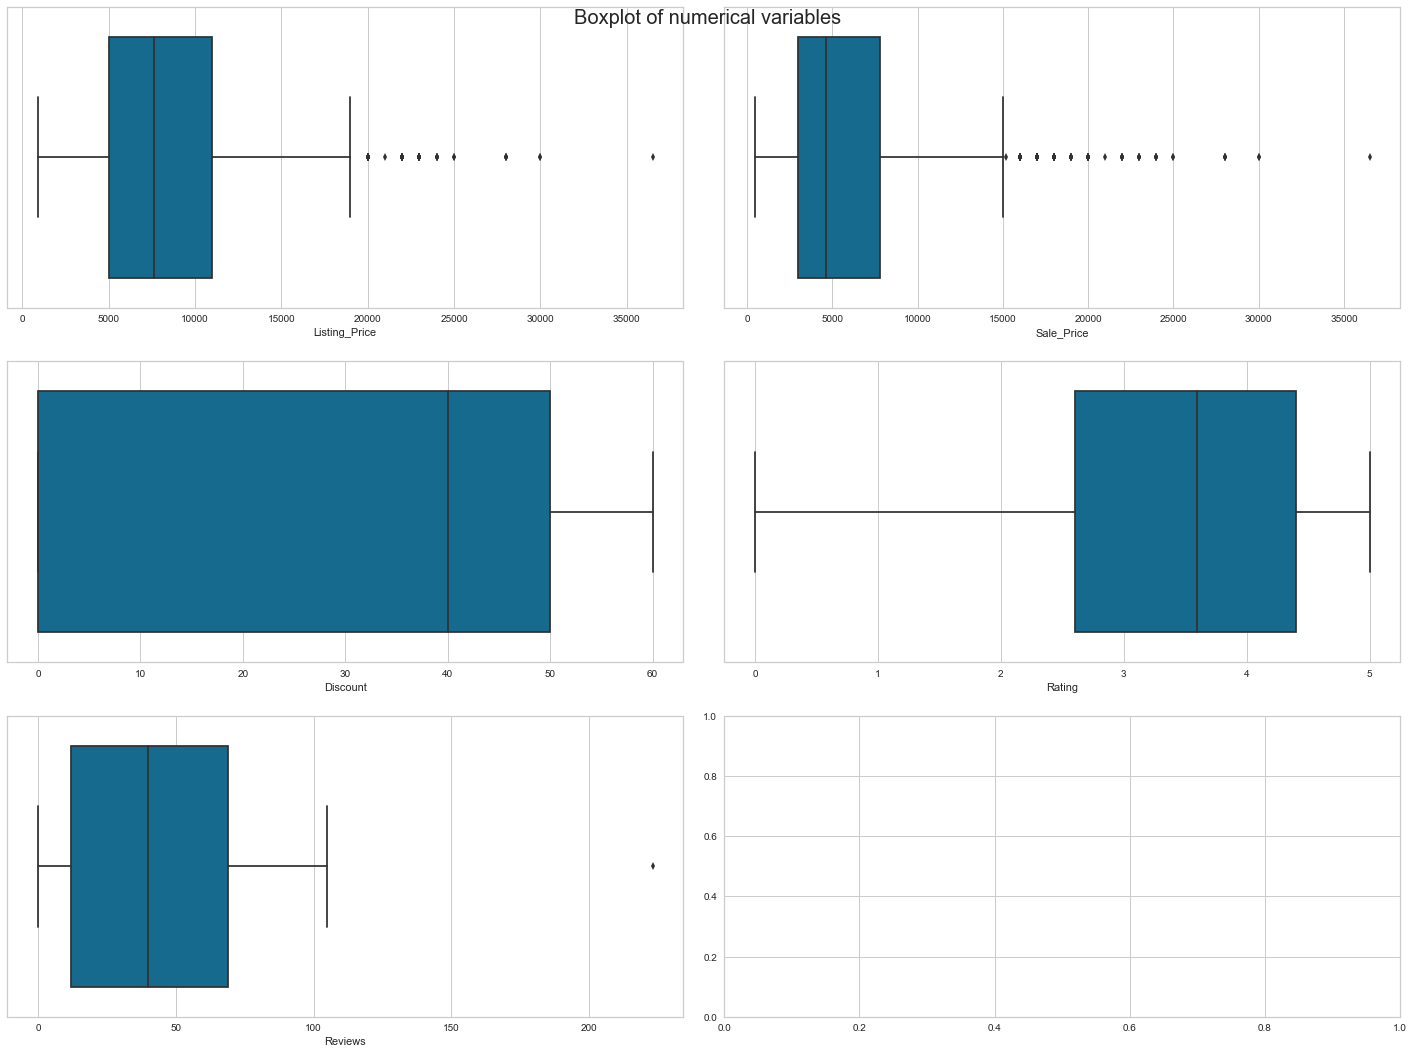

In [18]:
# selecting numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.boxplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- There are upper outliers in the listing price, which indicates very expensive products.
- There are upper outliers in the sale price too.
- Maximum discount given is 60%
- Majority of the ratings are between 2.5 and 4.5
- Number of reviews are between 1 and 100, with one outlier value above 200.

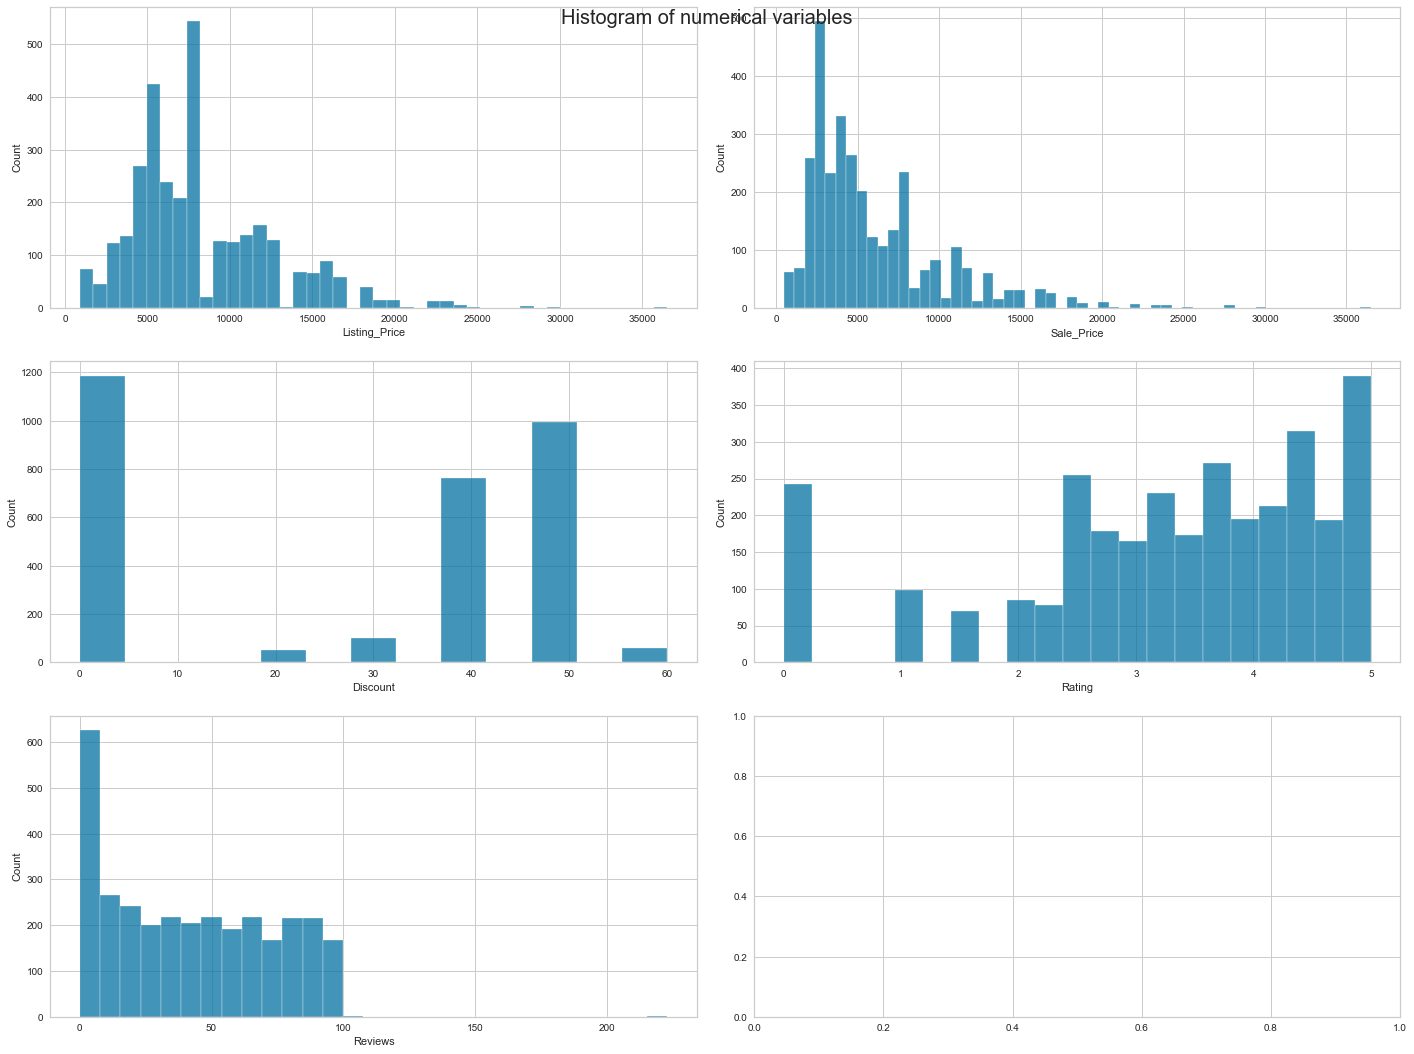

In [19]:
# select numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.histplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.histplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- Listing price and sale price distribution is right skewed.
- Rating is left skewed.



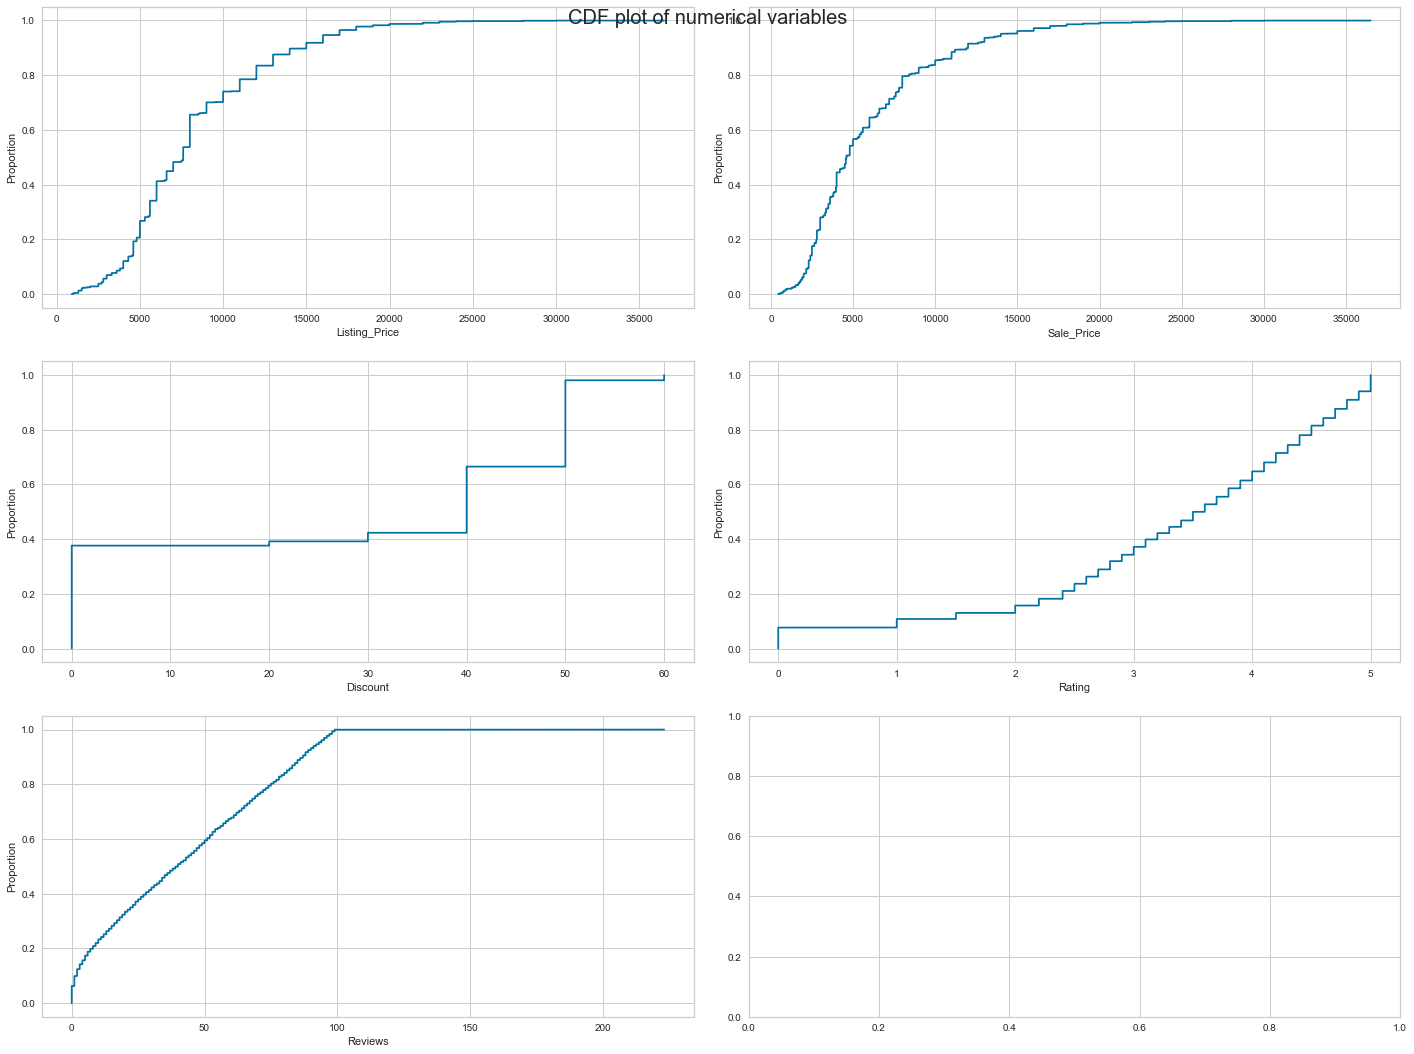

In [20]:
# select numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

**Observations**
- 90 % of the products have listing price less than 15000.
- 95% of the product have sale price less than 15000.
- 80% of the products have at least 50% discount or less than 50 %. 
- 50 % off the products have rating 3.5 or less than 3.5
- Almost all products have 100 or less than 100 reviews.

## Bivariate Analysis

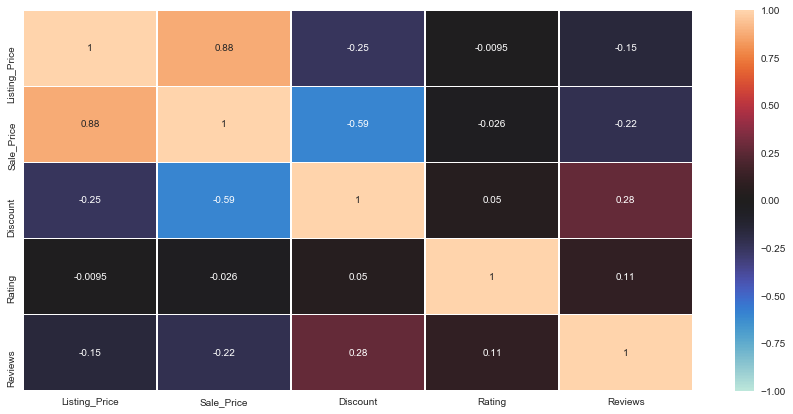

In [21]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

**Observations**
- sale price and listing price is highly positively correlated which is obvious
- Discount is somewhat negative correlated with listing price or sale price. which indicates that expensive products either have less discounts or no discounts

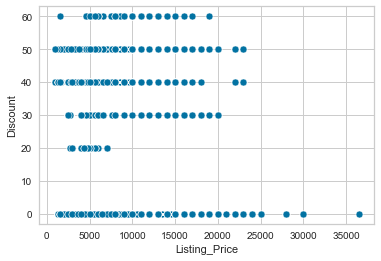

In [22]:
sns.scatterplot(x=df.Listing_Price,y=df.Discount)

**Observations**
- Majority 60% discounts and 50% discounts is given to any products whose listing price is 10,000 or less.

In [23]:
# variables used for clustering
all_col

['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']

In [24]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)   

In [25]:
# Creating a dataframe of the above results
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0907211006458244
Number of Clusters: 2 	Average Distortion: 1.712012896274925
Number of Clusters: 3 	Average Distortion: 1.555556101105242
Number of Clusters: 4 	Average Distortion: 1.445229276349941
Number of Clusters: 5 	Average Distortion: 1.3083060541300973
Number of Clusters: 6 	Average Distortion: 1.2304236643575353
Number of Clusters: 7 	Average Distortion: 1.169237332195863
Number of Clusters: 8 	Average Distortion: 1.1010292040841085


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

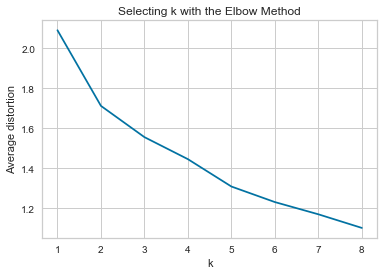

In [26]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Appropriate k seems to be 3 or 4.**

For n_clusters = 2, silhouette score is 0.33477783024101243)
For n_clusters = 3, silhouette score is 0.2974433054771778)
For n_clusters = 4, silhouette score is 0.3057063220202518)
For n_clusters = 5, silhouette score is 0.2703840930267695)
For n_clusters = 6, silhouette score is 0.2811661692670848)
For n_clusters = 7, silhouette score is 0.2912638027331031)
For n_clusters = 8, silhouette score is 0.29264099847026276)
For n_clusters = 9, silhouette score is 0.28596397198458673)


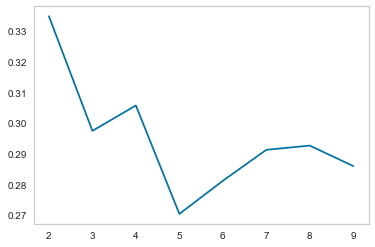

In [27]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

**Silhouette score for 4 is high, so we will choose 4 as value of k.**

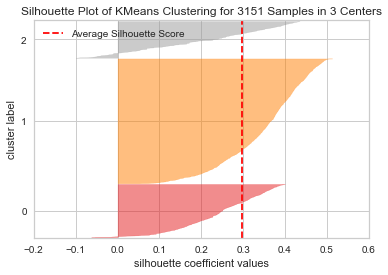

In [28]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

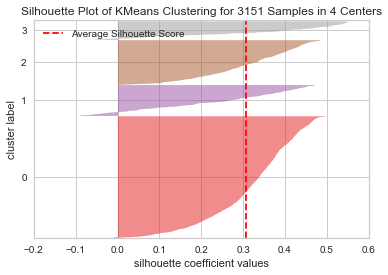

In [29]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [30]:
# lets us take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [31]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [32]:
cluster_profile = df.groupby('K_means_segments').mean()

In [33]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Sale_Price'].count().values

In [34]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
K_means_segments,,,,,,
0,15541.586283,13406.792035,8.761062,3.926327,31.869469,452
1,6801.354260,3686.673206,45.465247,3.390863,50.173206,1784
2,6498.135802,6159.969136,1.018519,3.797685,38.438272,648
3,9725.996255,8331.101124,7.715356,0.255805,11.898876,267


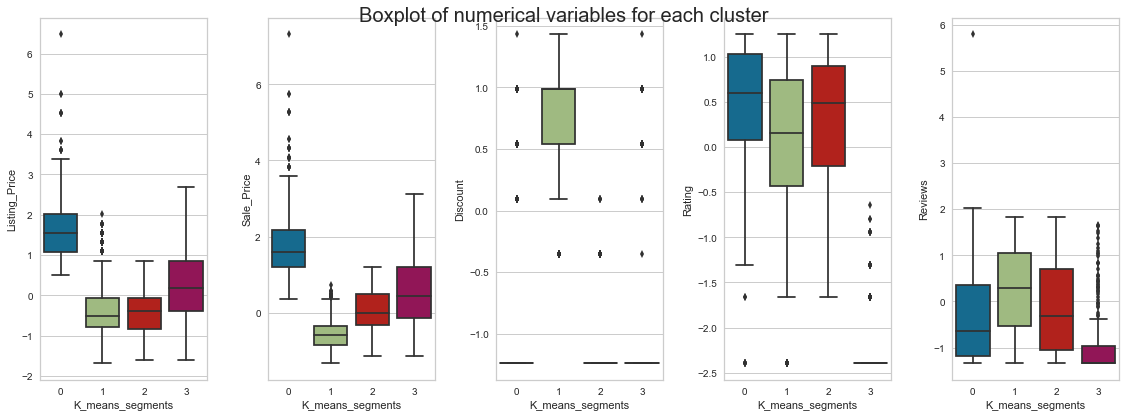

In [35]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

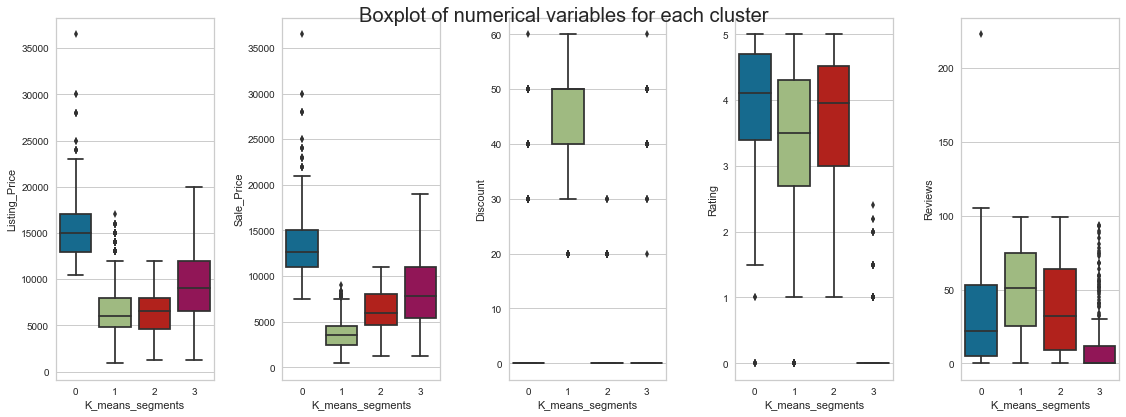

In [36]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains premium products which are more expensive, with an average listing price of approximately 15500.
    - Almost no discount is given to products in these cluster.
    - The median rating of this cluster is around 4 suggesting that, customers are very satisfied with 50% of the products in this clusters.
    - Products in this clusters have got lesser reviews, which can be due to the fact that these products are very expensive and fewer people buy them.
   
- **Cluster 1**:
    - Listing price is low for products in this cluster, and sale price is lower, as there are heavier discounts on these products.
    - 50% of the products have discount between 30% to 40%.
    - More than 50% of products have rating from 2.5 to 4.5 which indicates that customers satisfaction varies across products in this cluster.
    - On an average, 50 reviews is given to products in this cluster.
    
- **Cluster 2**:
    - Listing price of products in this cluster are similir to those in Cluster 1, but sale price is comparatively higher as there are almost no discounts.
    - On an average, 38 reviews is given to products in this cluster.

- **Cluster 3**:
    - Listing and sale price of products in this cluster suggest that these are medium range products.
    - Almost no discount is given to products in these cluster.
    - Products in this cluster have low rating or no rating at all.

**Lets compare Cluster vs Brand**

In [37]:
pd.crosstab(df.K_means_segments, df.Brand).style.highlight_max(color = 'lightgreen', axis = 0)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,,
0,0,0,135,128,189
1,1,864,563,356,0
2,0,229,155,99,165
3,0,18,53,23,173


**Observations**
- Adidas gives more discounts on their products, while Nike barely gives any.
- Nearly one-third of Nike products are premium in nature.

### Business Recommendations

- Cluster 0 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.
- Cluster 0 products can also be made available in showrooms situated in premium locations, because people generally tend to buy the premium products from showrooms.
- Cluster 1 consists of products which are sold at higher discounts, so these might be the ones which are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.
- Cluster 2 and 3 consists of products with comparatively low and medium price with almost no discount, so general marketing campaigns can be done for these to target the general public.